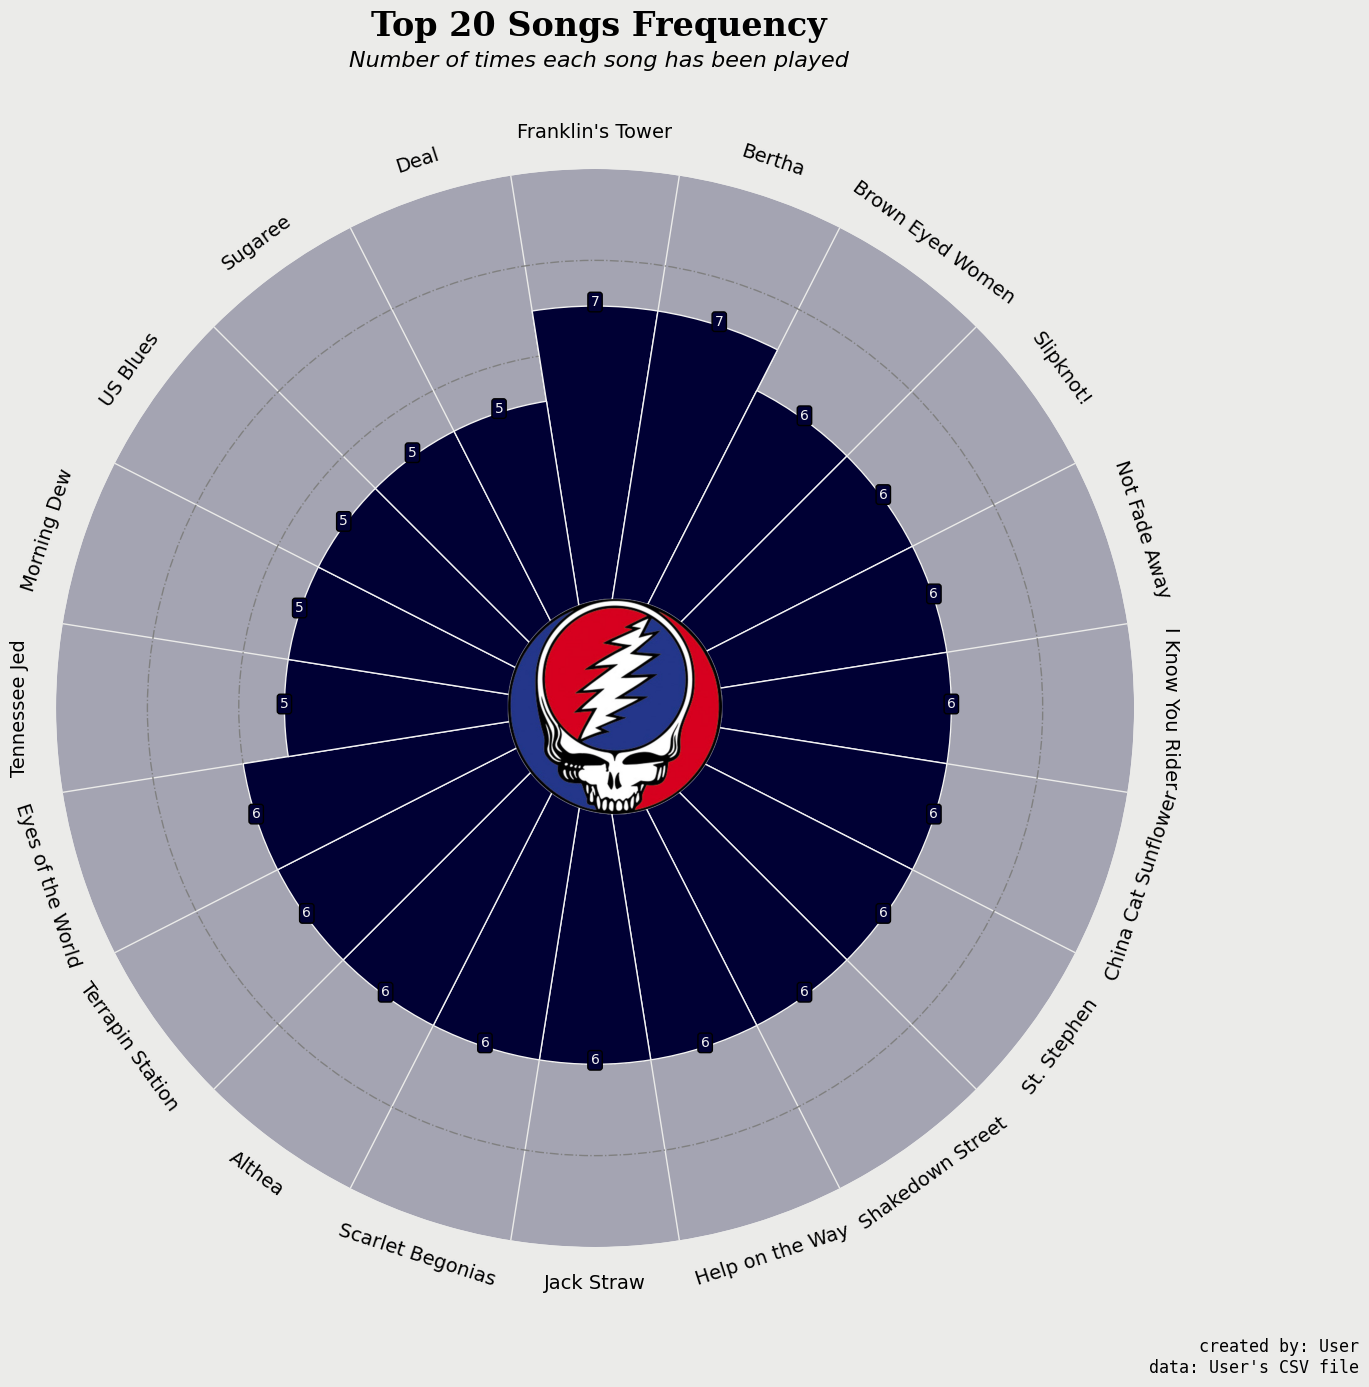

In [55]:
from mplsoccer import PyPizza, add_image
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the CSV file
file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/sphere/dnc_sphere_data.csv'
data = pd.read_csv(file_path)

# Prepare the data for the pizza chart
song_counts = data['Song'].value_counts()

# Define the parameters and values for the pizza chart
params = song_counts.index.tolist()
values = song_counts.values.tolist()

# Filter out 'Drums' and 'Space'
filtered_params_values = [(p, v) for p, v in zip(params, values) if p not in ['Drums', 'Space']]
params, values = zip(*filtered_params_values)

# Limit the number of parameters to improve readability
top_n = 20
params = params[:top_n]
values = values[:top_n]

# Color for the slices and text
slice_colors = ["#000034"] * len(params)
text_colors = ["#F2F2F2"] * len(params)

# Define the min and max range lists
min_range = [0] * len(params)
max_range = [10] * len(params)  # Set max range to 10 for all parameters

# Instantiate PyPizza class with specified range
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-.",           # linestyle for other circles
    inner_circle_size=18,           # size of inner circle
    min_range=min_range,            # set the minimum range list
    max_range=max_range             # set the maximum range list
)

# Plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(16, 14),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.3,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=14,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=10,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# Add title
fig.text(
    0.515, 0.975, "Top 20 Songs Frequency", size=24,
    ha="center", color="#000000",
    fontdict={'family': 'serif', 'weight': 'bold'}
)

# Add subtitle
fig.text(
    0.515, 0.953,
    "Number of times each song has been played",
    size=16,
    ha="center", color="#000000",
    fontdict={'family': 'sans-serif', 'style': 'italic'}
)

# Add credits
CREDIT_1 = "created by: User"
CREDIT_2 = "data: User's CSV file"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=12,
    ha="right", color="#000000",
    fontdict={'family': 'monospace'}
)

# Load the local image
image_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/sphere/dnc_logo.png'  # Replace with your local image path
image = Image.open(image_path)

# Add image
ax_image = add_image(
    image, fig, left=0.4, bottom=0.37, width=0.25, height=0.25
)   # these values might differ when you are plotting

plt.show()
